In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
col=["#a20021","#4f5d2f","#fdb833","#ff8595","#3d315b","#310a31","#08080c"]
col2=['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']


In [4]:
class time:

    def __init__(self, s: str):
        t = {"d":0, "h":0, "min":0, "s":0}
        s = s.split()
        for i, v in enumerate(s):
            if i%2 == 0:
                t[s[i+1]] = int(v)
                
        self.d = t["d"]    
        self.h = t["h"]
        self.min = t["min"]
        self.s = t["s"]
        
        self.in_s = self.d*24*3600+self.h*3600+self.min*60+self.s
        self.in_min = self.d*24*60+self.h*60+self.min+self.s/60
        self.in_h = self.d*24+self.h+self.min/60+self.s/3600



In [5]:
T = time("1 h 5 min")

T.in_h

1.0833333333333333

In [6]:
path = "inba.txt"
with open(path) as f:
    lines = f.readlines()

for li, lv in enumerate(lines[6:]):
    lines[li+6] = lv.rstrip("\n").split("\t")[3:]

In [7]:
T = []
blank = []
raw = []
corr = []

flag = 0
for i, v in enumerate(lines[6]):
    if flag == 0:
        t = time(v)
        T.append(t.in_h)
        blank.append(float(lines[7][i]))
        s = 0
        for k in lines[8:]:
            s += float(k[i])
        raw.append(s/len(lines[8:]))
        if time(lines[6][i+1]).in_h == 0:
            flag = 1
        
    elif flag == 1:
        s = 0
        for k in lines[8:]:
            s += float(k[i])
        corr.append(s/len(lines[8:]))

In [23]:
name = "BI w 37$^{\circ}$C pH=2, 0,1M NaCl"

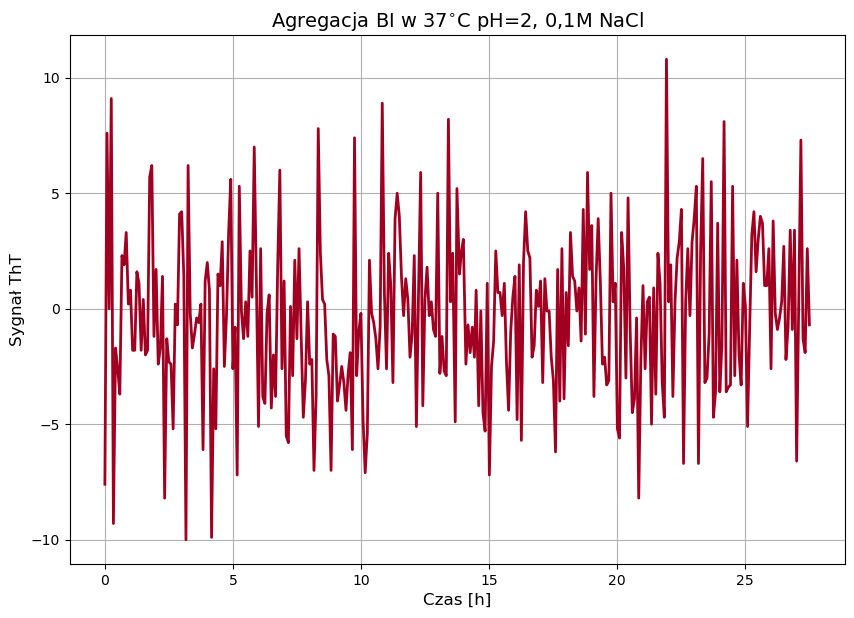

In [30]:
plt.rc('text', usetex = False)
title="Agregacja " + name
plt.figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')    
plt.plot(T, corr, linewidth=2, color=col[0], label=None)
plt.ylabel('Sygnał ThT', fontsize = 12)
plt.xlabel('Czas [h]', fontsize = 12)
plt.title(title, fontsize = 14)
#plt.axis([0, 210 , 0, 0.58])
#plt.axis([0, (i+10)*dt , 0, r+0.5])
plt.grid()
plt.savefig("pic" +'.png')
#plt.close()


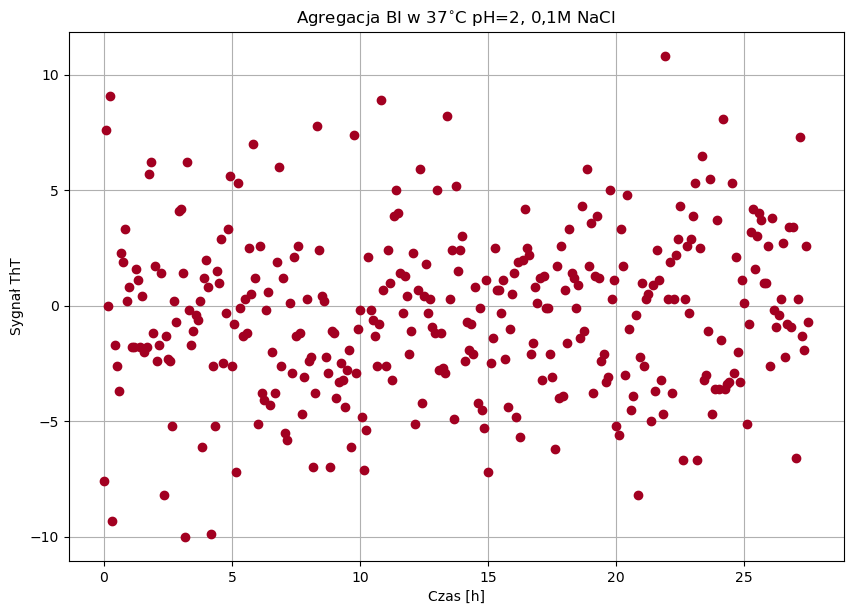

In [29]:
title="Agregacja " + name
plt.figure(num=None, figsize=(10, 7), dpi=100, facecolor='w', edgecolor='k')  
plt.plot(T, corr, 'o', linewidth=2, color=col[0], label=None)
plt.ylabel('Sygnał ThT', fontsize = 12)
plt.xlabel('Czas [h]', fontsize = 12)
plt.title(title, fontsize = 14)
#plt.axis([0, 210 , 0, 0.58])
#plt.axis([0, (i+10)*dt , 0, r+0.5])
plt.grid()
plt.savefig("pic1" +'.png')
#plt.close()